# Chuẩn bị dữ liệu

In [1]:
import pyodbc
import pandas as pd
import numpy as np

In [2]:
server_name = 'DESKTOP-TOL1F2F\MSSQLSERVERBI'
database_name = 'AdventureWorks2012'

connection = pyodbc.connect('Driver={SQL Server}; Server=' + server_name +
                      '; Database=' + database_name +
                      '; Trusted_Connection=yes;')

In [3]:
df = pd.read_sql_query(
    "select p.ProductID, p.Name, p.MakeFlag, p.FinishedGoodsFlag, p.Color,\
        p.ReorderPoint, p.StandardCost, p.ListPrice, count(p.ProductID) as unit\
    from Sales.SalesOrderDetail sod\
        join Production.Product p on sod.ProductID=p.ProductID\
        join Sales.SpecialOffer so on sod.SpecialOfferID=so.SpecialOfferID\
    group by p.ProductID, p.Name, p.MakeFlag, p.FinishedGoodsFlag, p.Color,\
        p.ReorderPoint, p.StandardCost, p.ListPrice",
    connection) 

df.head()

,ProductID,Name,MakeFlag,FinishedGoodsFlag,Color,ReorderPoint,StandardCost,ListPrice,unit
0,707,"Sport-100 Helmet, Red",False,True,Red,3,13.0863,34.99,3083
1,708,"Sport-100 Helmet, Black",False,True,Black,3,13.0863,34.99,3007
2,709,"Mountain Bike Socks, M",False,True,White,3,3.3963,9.50,188
3,710,"Mountain Bike Socks, L",False,True,White,3,3.3963,9.50,44
4,711,"Sport-100 Helmet, Blue",False,True,Blue,3,13.0863,34.99,3090


# Thống kê mô tả

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          266 non-null    int64  
 1   Name               266 non-null    object 
 2   MakeFlag           266 non-null    bool   
 3   FinishedGoodsFlag  266 non-null    bool   
 4   Color              224 non-null    object 
 5   ReorderPoint       266 non-null    int64  
 6   StandardCost       266 non-null    float64
 7   ListPrice          266 non-null    float64
 8   unit               266 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 15.2+ KB


In [5]:
df.describe(include='all')

,ProductID,Name,MakeFlag,FinishedGoodsFlag,Color,ReorderPoint,StandardCost,ListPrice,unit
count,266.000000,266,266,266,224,266.000000,266.000000,266.000000,266.000000
unique,NaN,266,2,1,8,NaN,NaN,NaN,NaN
top,NaN,"Mountain-300 Black, 48",True,True,Black,NaN,NaN,NaN,NaN
freq,NaN,1,190,266,79,NaN,NaN,NaN,NaN
mean,857.639098,NaN,NaN,NaN,NaN,198.473684,449.194298,764.653252,456.078947
std,84.860270,NaN,NaN,NaN,NaN,163.493261,549.754883,919.835508,611.515807
min,707.000000,NaN,NaN,NaN,NaN,3.000000,0.856500,2.290000,2.000000
25%,783.250000,NaN,NaN,NaN,NaN,75.000000,35.959600,65.122500,159.000000
50%,863.500000,NaN,NaN,NaN,NaN,75.000000,199.851900,348.760000,257.500000
75%,931.750000,NaN,NaN,NaN,NaN,375.000000,601.743700,1079.990000,490.500000


In [6]:
df['Color'].value_counts()

Black           79
Silver          35
Yellow          34
Red             31
Blue            26
Multi            8
Silver/Black     7
White            4
Name: Color, dtype: int64

# Mã hoá dữ liệu

In [14]:
df[['MakeFlag']].astype(int)

,MakeFlag
0,0
1,0
2,0
3,0
4,0
...,...
261,1
262,1
263,1
264,1


In [15]:
pd.get_dummies(df[['Color']])

,Color_Black,Color_Blue,Color_Multi,Color_Red,Color_Silver,Color_Silver/Black,Color_White,Color_Yellow
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0
263,1,0,0,0,0,0,0,0
264,1,0,0,0,0,0,0,0


In [17]:
df_1 = pd.concat([df[['MakeFlag']].astype(int),
                  df[['FinishedGoodsFlag']].astype(int),
                  pd.get_dummies(df[['Color']]),
                  df[['ReorderPoint', 'StandardCost', 'ListPrice', 'unit']]
                ], axis=1)
df_1

,MakeFlag,FinishedGoodsFlag,Color_Black,Color_Blue,Color_Multi,Color_Red,Color_Silver,Color_Silver/Black,Color_White,Color_Yellow,ReorderPoint,StandardCost,ListPrice,unit
0,0,1,0,0,0,1,0,0,0,0,3,13.0863,34.99,3083
1,0,1,1,0,0,0,0,0,0,0,3,13.0863,34.99,3007
2,0,1,0,0,0,0,0,0,1,0,3,3.3963,9.50,188
3,0,1,0,0,0,0,0,0,1,0,3,3.3963,9.50,44
4,0,1,0,1,0,0,0,0,0,0,3,13.0863,34.99,3090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,1,0,0,0,0,0,0,0,0,375,23.9716,53.99,150
262,1,1,0,0,0,0,0,0,0,0,375,53.9416,121.49,218
263,1,1,1,0,0,0,0,0,0,0,75,343.6496,539.99,466
264,1,1,1,0,0,0,0,0,0,0,75,343.6496,539.99,685


# Trực quan hoá dữ liệu

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

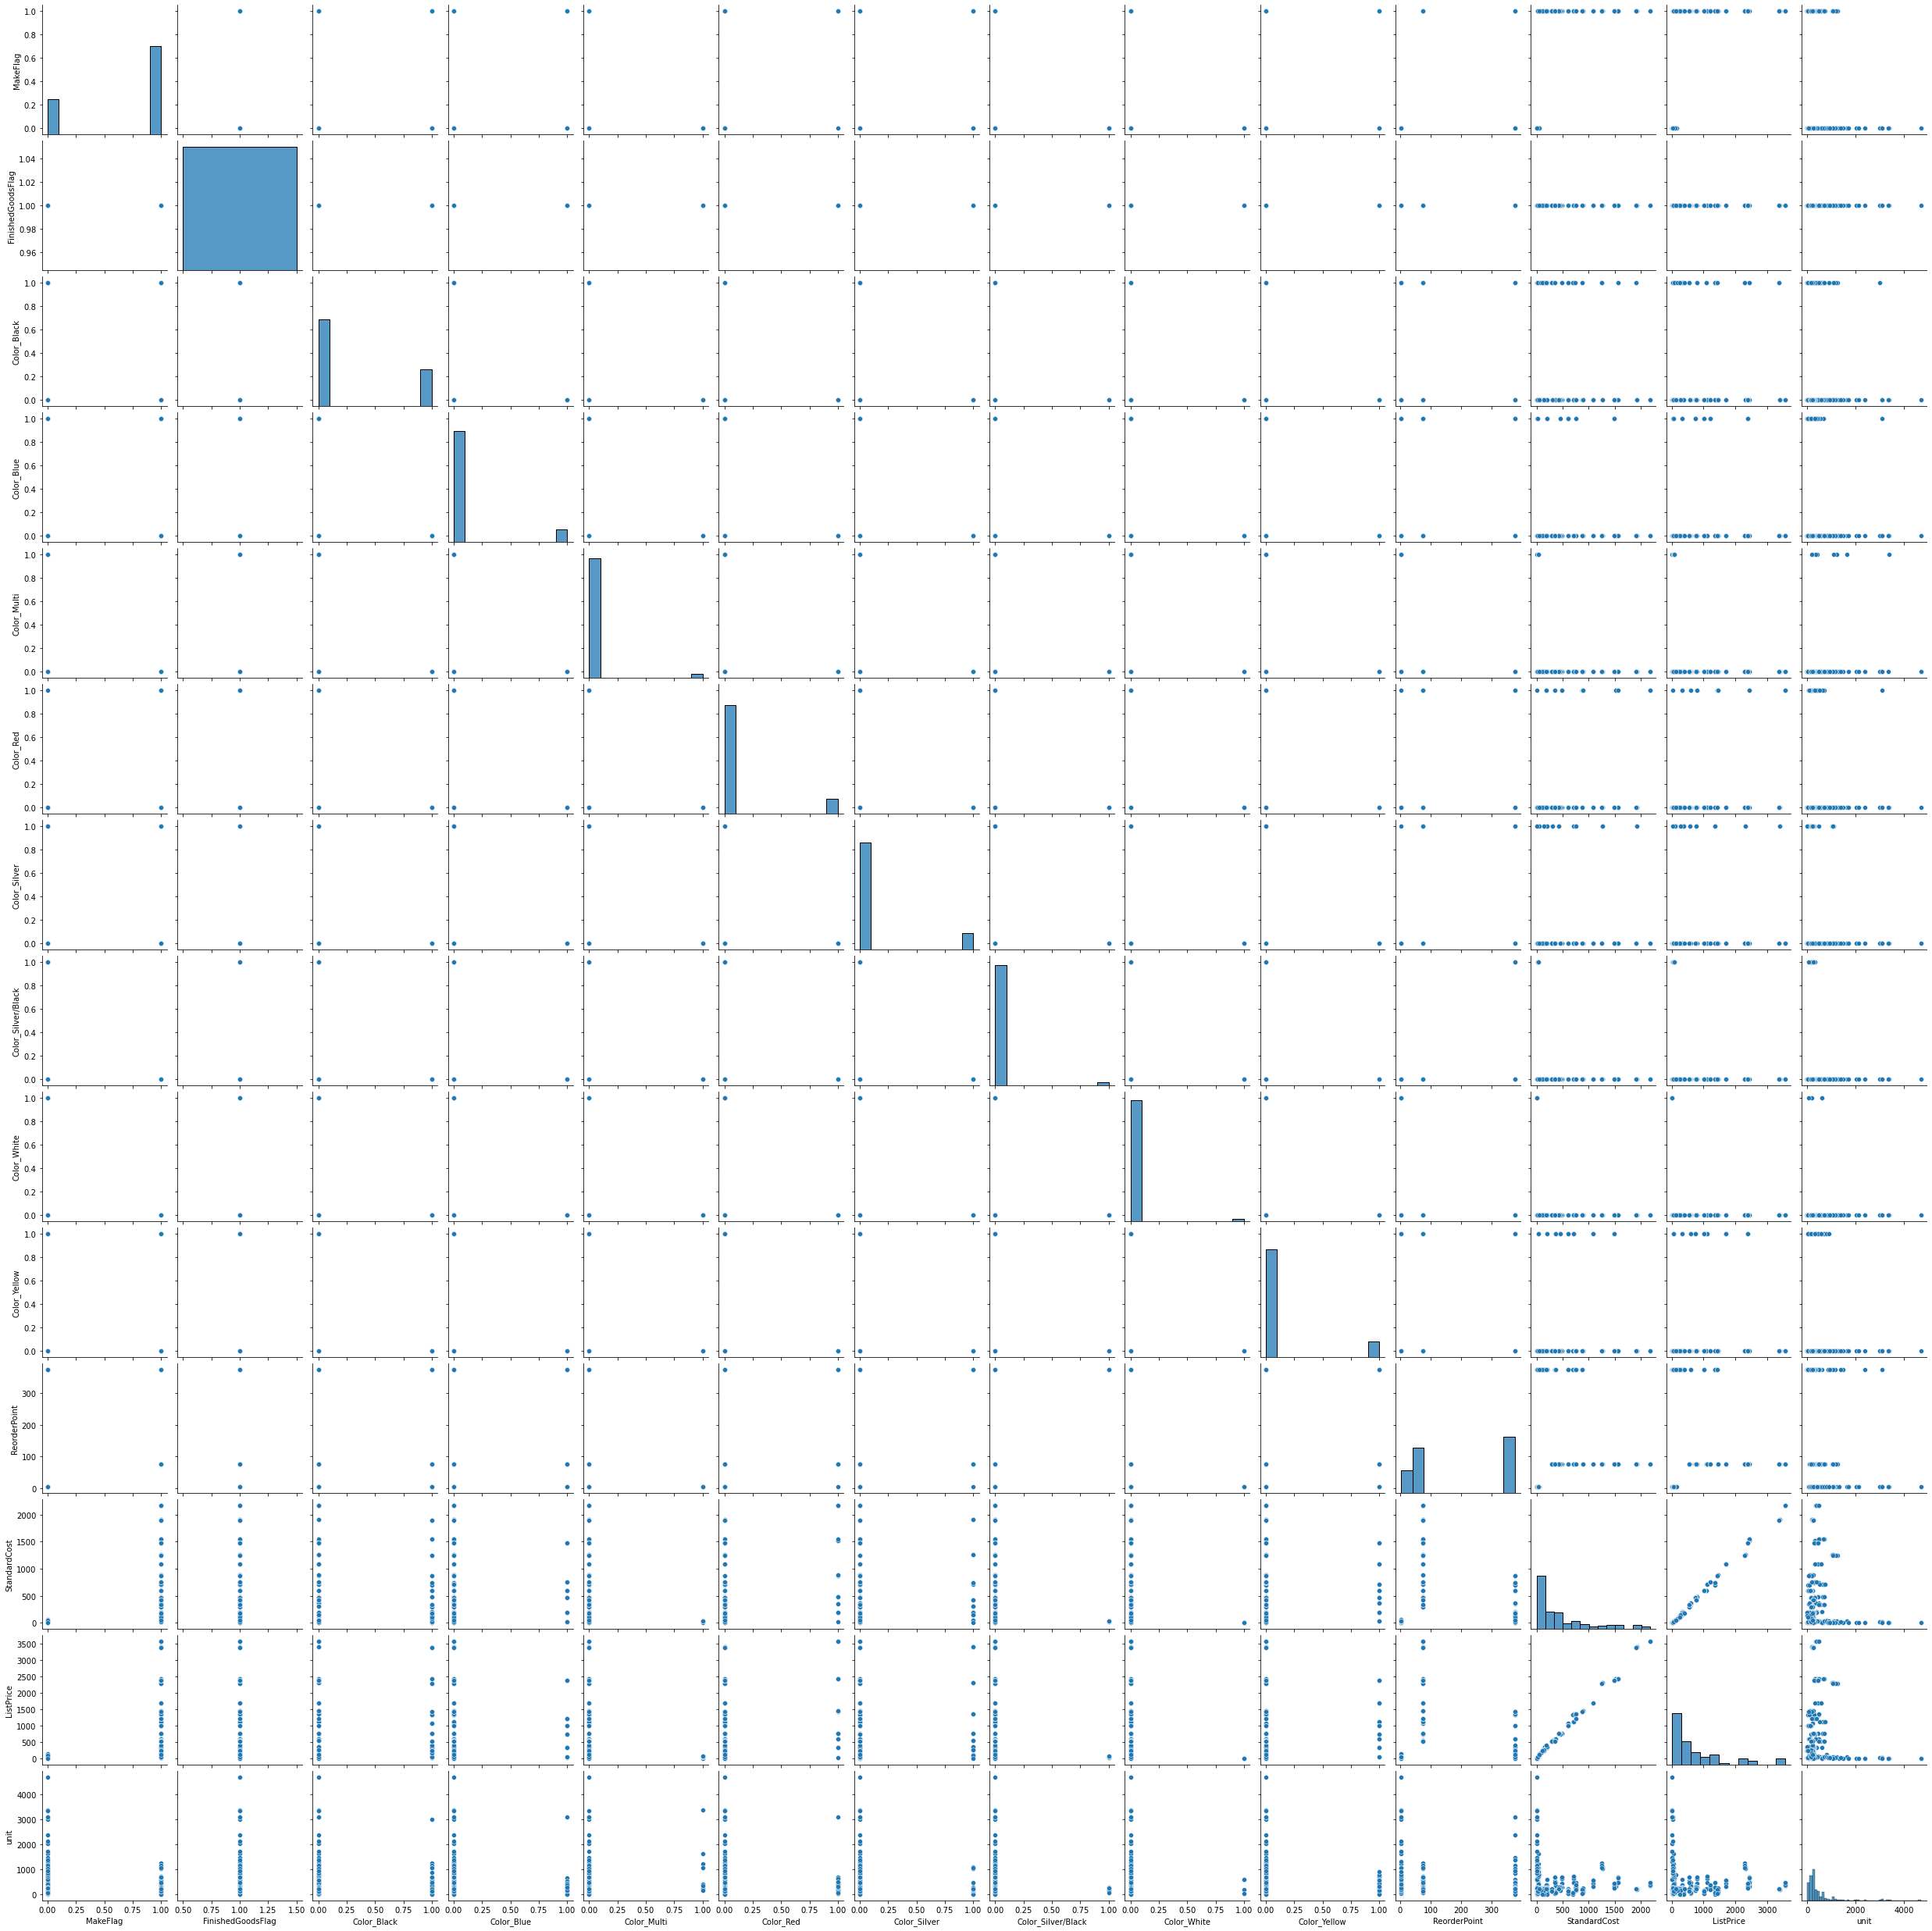

In [20]:
sns.pairplot(df_1)